In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Loading data
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# train.loc[train['Sex'] == train.Age.min()]
# train.loc[train['Sex'] == 'male'].min()
(train['Age'] < 1).value_counts()
# train[train['Sex'] == 1].min()

False    884
True       7
Name: Age, dtype: int64

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

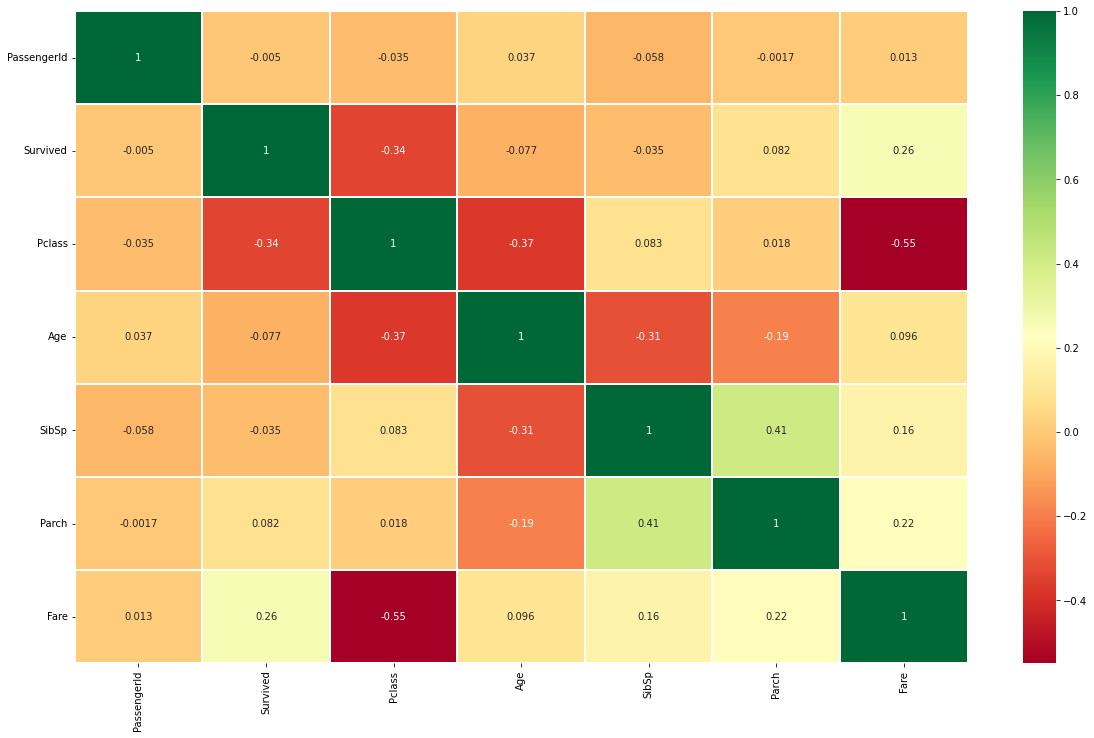

In [6]:
#Heatmap
sns.heatmap(train.corr(),   
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20, 12)
plt.show()

In [7]:
train.Age.min()

0.42

In [8]:
train.Age.max()

80.0

In [9]:
train.shape

(891, 12)

In [10]:
df = train
df = df.drop(['Ticket','Cabin'], axis=1)
df = df.dropna() # Remove NaN values
fig = plt.figure(figsize=(18,6), dpi=1600) # Specifies the parameters of our graphs
alpha = alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0)) # Plotting diffrent graphs together                
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart) # Plots a bar graph of those who surived vs those who did not
ax1.set_xlim(-1, 2) # This nicely sets the margins in matplotlib  
plt.title('Distribution of Survival, (1 = Survived)') # Puts a title on our graph   

plt.subplot2grid((2,3),(0,1))
# df.Age.value_counts().plot(kind='bar', alpha=alpha_bar_chart) # Sets the y axis label
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot) # Sets the y axis label

# plt.hist(df.Age, bins=7, histtype='bar', rwidth=0.9)
plt.xlabel('Age groups')
plt.ylabel('Number of passengers')
plt.grid(b=True, which='major', axis='y')  
plt.title('Survival by Age,  (1 = Survived)')

# plt.show()            
# plt.ylabel('Age') # Formats the grid line style of our graphs 

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind='barh', alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title('Class Distribution')

plt.subplot2grid((2,3),(1,0), colspan=2)
# Plots a kernel density estimate of the subset of the 1st class passanger' age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')

plt.xlabel('Age')  # Plots an axis label
plt.title('Age Distribution within classes')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')  # sets our legend for our graph

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.title('Passengers per boarding location')   # Specifies the parameters of our graphs

Text(0.5, 1.0, 'Passengers per boarding location')

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

C:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

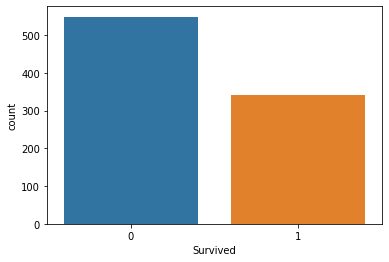

In [ ]:
# Visualize the count of number of survivors
sns.countplot(train['Survived'], label='Count')

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
#Look at survival rate by sex
train.groupby('Sex')[['Survived', 'Age']].mean()

Survived        Age
Sex                        
female  0.742038  27.915709
male    0.188908  30.726645

In [ ]:
train[['Sex', 'Fare', 'Age']].groupby(['Sex'], as_index=True).mean()

Fare        Age
Sex                         
female  44.479818  27.915709
male    25.523893  30.726645

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

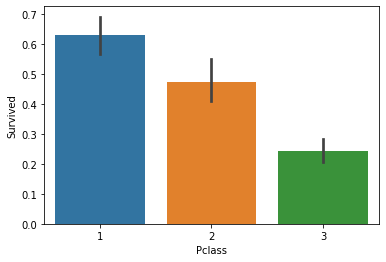

In [ ]:
# Plot the survival rate of each class
sns.barplot(x='Pclass', y='Survived', data=train)

In [ ]:
# Look at survival rate by sex and class
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


Look at the survival rate by sex and class. From the pivot table above, we see that females in first class had a survival rate of about 96.8% of class 1 and 92% for class 2. 
Males in third class had the lowest survival rate at about 13.54%, meaning the majority of them did not survive.


In [ ]:
train.pivot_table('Age', index='Pclass', columns=['Sex', 'Survived'])

Sex          female                  male           
Survived          0          1          0          1
Pclass                                              
1         25.666667  34.939024  44.581967  36.248000
2         36.000000  28.080882  33.369048  16.022000
3         23.818182  19.329787  27.255814  22.274211


Surprisingly, younger males of all three classes had more chances of survival.

<AxesSubplot:xlabel='Sex'>

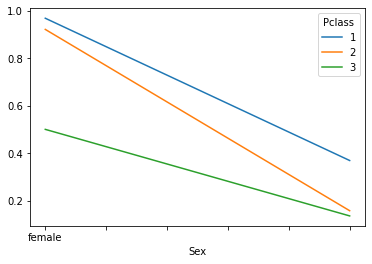

In [ ]:
# Look at survival rate by sex and class visually
train.pivot_table('Survived', index='Sex', columns='Pclass').plot()

In [ ]:
# Look at survival rate by sex, age and class
age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

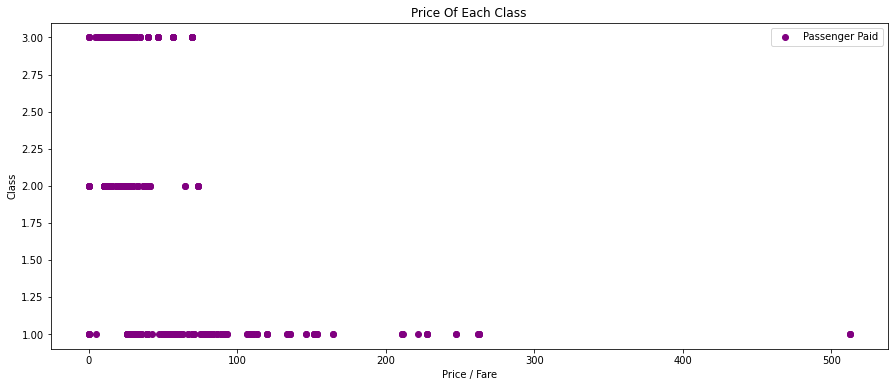

In [ ]:
#Plot the Prices Paid Of Each Class
# import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.scatter(train['Fare'], train['Pclass'],  color='purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [ ]:
train[['Sex', 'Fare', 'Age']].groupby(['Sex'], as_index=True).mean()

Fare        Age
Sex                         
female  44.479818  27.915709
male    25.523893  30.726645

C:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


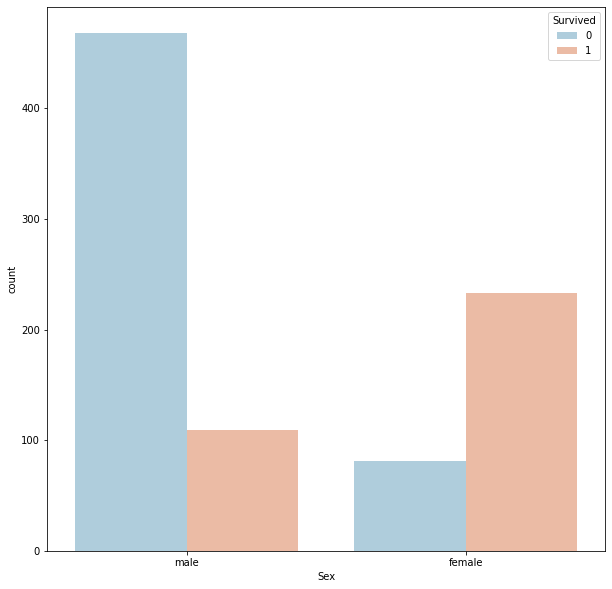

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot('Sex', hue='Survived', data=train, palette='RdBu_r')
plt.show()

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

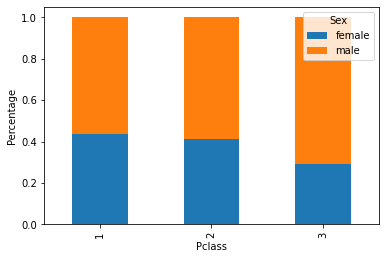

In [ ]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [ ]:
tab.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import cufflinks as cf

# Labels
lab = df['Survived'].value_counts().keys().tolist()
# Values
val = df['Survived'].value_counts().values.tolist()
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['red']), 
                hoverinfo='value'
              )
data = [trace]

# layout: you can plot title, x and y axis titles or show legends 
layout = go.Layout(title='Survived Distribution')                # Set title
 
# figure: when you want to show on a graph, it takes the defined data and layout parameters
fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [ ]:
# Statistical o/p of non numeric features.
train.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [ ]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print('Survived: %i (%.1f%%)' %(len(survived), float(len(survived))/len(train)*100.0))
print('Not Survived: %i (%.1f%%)' %(len(not_survived), float(len(not_survived))/len(train)*100.0))
print('Total: %i' %len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891



Pclass vs. Survival
Higher class passengers have better survival chance.


In [ ]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [ ]:
train.groupby('Sex').Pclass.value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

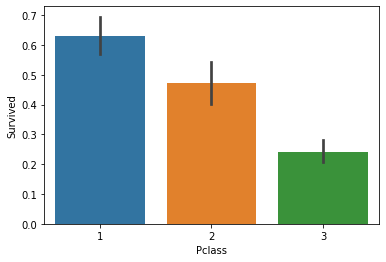

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [ ]:
y = []
fare = []
for i in list(df['Pclass'].unique()):
    result = df[df['Pclass'] == i]['Age'].mean()
    fares = df[df['Pclass'] == i]['Fare'].mean()
    y.append(result)
    fare.append(fares)
 
# Defining data
trace = go.Bar(x = list(df['Pclass'].unique()), y=y, marker=dict(color=fare,colorscale='Viridis', showscale=True), text=fare)
data=[trace]

# Defining layout
layout = go.Layout(title='Age/Fare vs Pclass Bar Chart', xaxis=dict(title='Pclass'), yaxis=dict(title='Age'), hovermode='closest')

# Defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

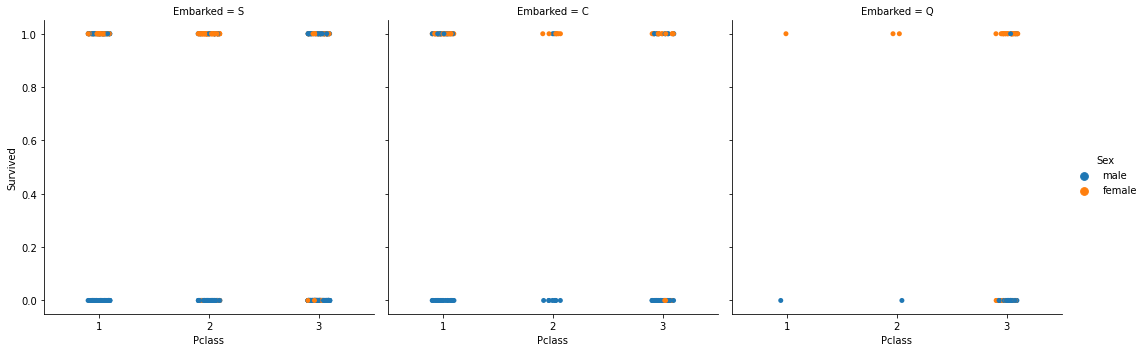

In [ ]:
# Pclass, Sex & Embarked vs. Survival
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Embarked vs. Survived
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [ ]:
train.groupby('Embarked')[['Survived']].mean()

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

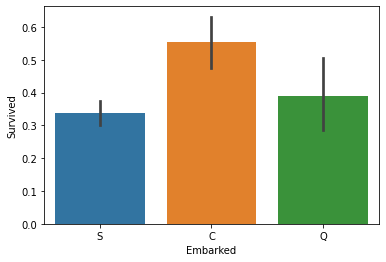

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [ ]:
# Parch vs. Survival
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [ ]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [ ]:
train.groupby('Parch')[['Survived']].mean()

Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

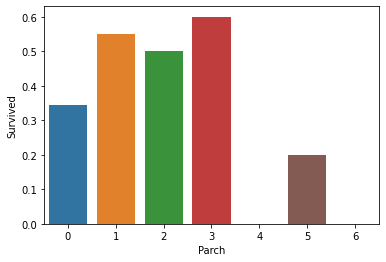

In [ ]:
# train.groupby('Parch').Survived.mean().plot(kind='bar')
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

In [ ]:
#SibSp vs. Survival
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [ ]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [ ]:
train.groupby('SibSp')[['Survived']].mean()

Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

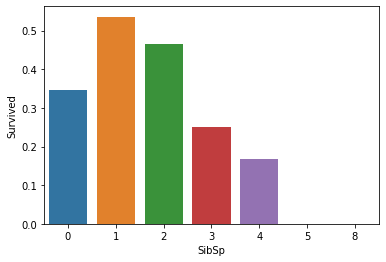

In [ ]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

C:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



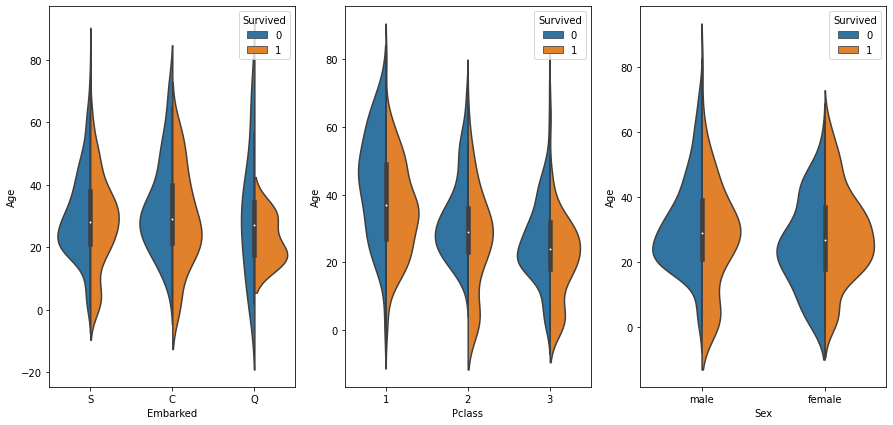

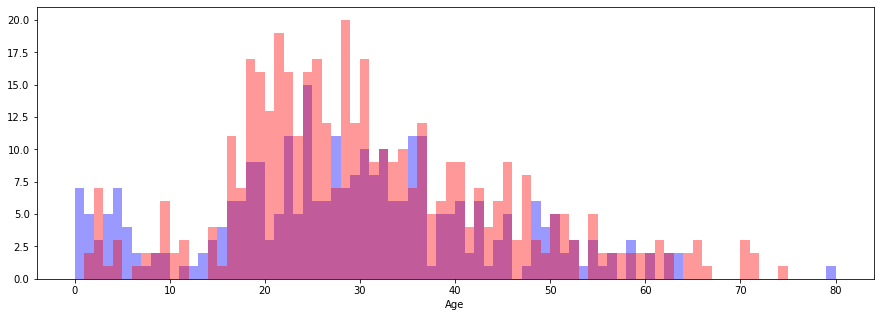

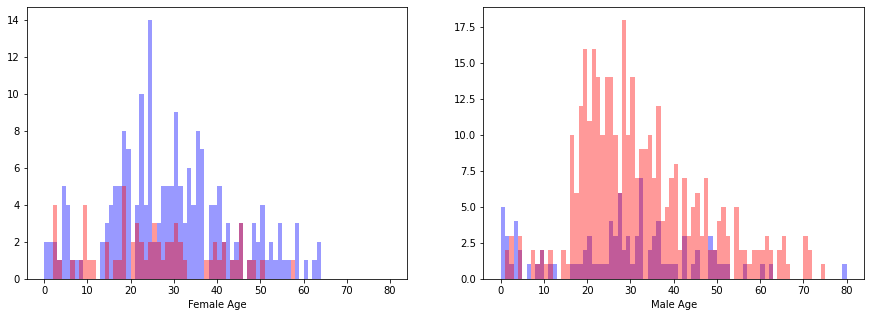

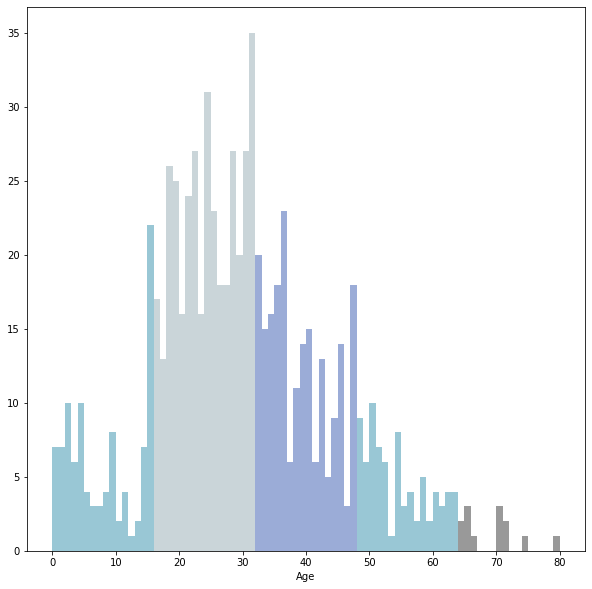

C:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



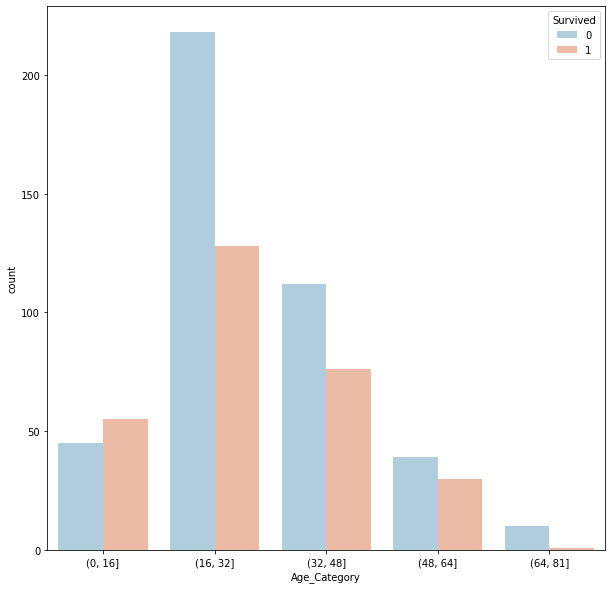

In [ ]:
# Remove this ?
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# PLot 1
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

# Plot 2
plt.figure(figsize=[15, 5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

# PLot 3
plt.figure(figsize=[15, 5])
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

plt.figure(figsize=[10, 10])
sns.distplot(train['Age'].dropna().values, bins=range(0, 17), kde=False, color="#007598")
sns.distplot(train['Age'].dropna().values, bins=range(16, 33), kde=False, color="#7B97A0")
sns.distplot(train['Age'].dropna().values, bins=range(32, 49), kde=False, color="#06319B")
sns.distplot(train['Age'].dropna().values, bins=range(48, 65), kde=False, color="#007598")
sns.distplot(train['Age'].dropna().values, bins=range(64, 81), kde=False, color="#000000", axlabel='Age')
plt.show()

train['Age_Category'] = pd.cut(train['Age'], bins=[0, 16, 32, 48, 64, 81])
plt.subplots(figsize=(10, 10))
sns.countplot('Age_Category', hue='Survived', data=train, palette='RdBu_r')
plt.show()

1) 1st Pclass has very few children as compared to other two classes. 
2) 1st Plcass has more old people as compared to other two classes. 
3) Almost all children (between age 0 to 10) of 2nd Pclass survived. 
4) Most children of 3rd Pclass survived. 
5) Younger people of 1st Pclass survived as compared to its older people. 

From Sex violinplot, we can see that:
1) Most male children (between age 0 to 14) survived. Females with age between 18 to 40 have better survival chance.
2) Combining both male and female, we can see that children with age between 0 to 5 have better chance of survival. 
3) Females with age between "18 to 40" and "50 and above" have higher chance of survival. 
4) Males with age between 0 to 14 have better chance of survival.

<AxesSubplot:>

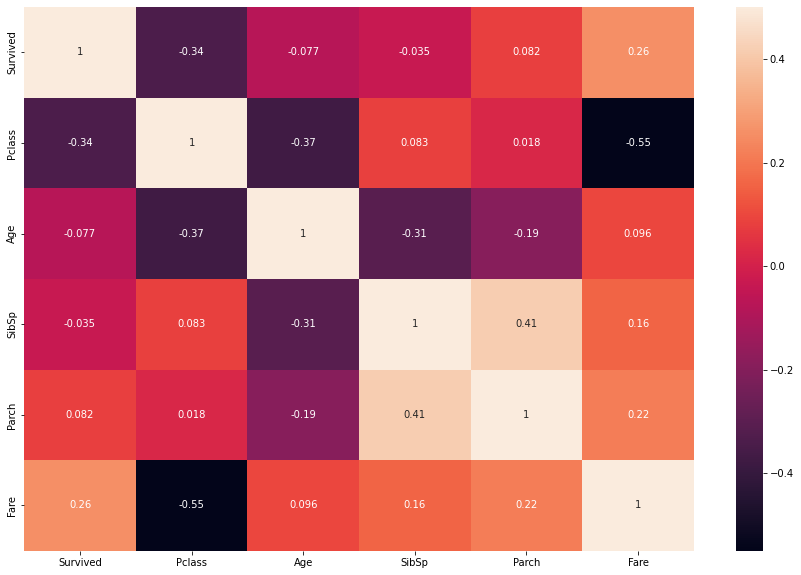

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=0.5, square=False, annot=True)

#### Feature Extraction 



In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

Let's first extract titles from Name column.


In [ ]:
train_test_data = [train, test] # Combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_Category Title  
0      0         A/5 21171   7.2500   NaN        S     (16, 32]    Mr  
1      0          PC 17599  71.2833   C85        C     (32, 48]   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S     (16, 32]  Miss  
3      0            113803  53.1000  C123        S     (32, 48]   Mrs  
4      0            373450   8.0500   NaN        S     (32, 48]    Mr

In [ ]:
pd.crosstab(train['Title'], train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [ ]:
# The number of passengers with each Title is shown above.We now replace some less common titles with the name 'Other'.
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Countess'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Lady', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.704301
2      Mr  0.156673
3     Mrs  0.795276
4   Other  0.285714

In [ ]:
# After that, we convert the categorical title values into numeric form.
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_Category  Title  
0      0         A/5 21171   7.2500   NaN        S     (16, 32]      1  
1      0          PC 17599  71.2833   C85        C     (32, 48]      3  
2      0  STON/O2. 3101282   7.9250   NaN        S     (16, 32]      2  
3      0            113803  53.1000  C123        S     (32, 48]      3  
4      0            373450   8.0500   NaN        S     (32, 48]      1

In [ ]:
(train['Title'] == 1).sum()

517

In [ ]:
# Sex Feature - We convert the categorical value of Sex into numeric. We represent 0 as female and 1 as male.
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked Age_Category  Title  
0         A/5 21171   7.2500   NaN        S     (16, 32]      1  
1          PC 17599  71.2833   C85        C     (32, 48]      3  
2  STON/O2. 3101282   7.9250   NaN        S     (16, 32]      2  
3            113803  53.1000  C123        S     (32, 48]      3  
4            373450   8.0500   NaN        S     (32, 48]      1

#### Let's check the number of passengers for each Embarked category.

In [ ]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train.Embarked.isna().sum()

2

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# We find that category 'S' has maximum passengers. Hence, we replace 'nan' values with 'S'.
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
# Now We convert the categorical value of Embarked into numeric. We represent 0 as S, 1 as C and 2 as Q.
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked Age_Category  Title  
0         A/5 21171   7.2500   NaN         0     (16, 32]      1  
1          PC 17599  71.2833   C85         1     (32, 48]      3  
2  STON/O2. 3101282   7.9250   NaN         0     (16, 32]      2  
3            113803  53.1000  C123         0     (32, 48]      3  
4            373450   8.0500   NaN         0     (32, 48]      1

In [ ]:
# (train['Embarked'] == 1).value_counts()
(train['Embarked'] == 1).sum()

168

#### Age Feature

In [ ]:
print('Train:', train.Age.isna().sum())
print('Test:', test.Age.isna().sum())

Train: 177
Test: 86


In [ ]:
train[train['Age'].isnull()][0:5]

PassengerId  Survived  Pclass                           Name  Sex  Age  \
5             6         0       3               Moran, Mr. James    0  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    0  NaN   
19           20         1       3        Masselmani, Mrs. Fatima    1  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    0  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"    1  NaN   

    SibSp  Parch  Ticket     Fare Cabin  Embarked Age_Category  Title  
5       0      0  330877   8.4583   NaN         2          NaN      1  
17      0      0  244373  13.0000   NaN         0          NaN      1  
19      0      0    2649   7.2250   NaN         1          NaN      3  
26      0      0    2631   7.2250   NaN         1          NaN      1  
28      0      0  330959   7.8792   NaN         2          NaN      2

In [ ]:
test[test['Age'].isnull()][0:5]

PassengerId  Pclass                                               Name  \
10          902       3                                   Ilieff, Mr. Ylio   
22          914       1               Flegenheim, Mrs. Alfred (Antoinette)   
29          921       3                                  Samaan, Mr. Elias   
33          925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
36          928       3                                Roth, Miss. Sarah A   

    Sex  Age  SibSp  Parch      Ticket     Fare Cabin  Embarked  Title  
10    0  NaN      0      0      349220   7.8958   NaN         0      1  
22    1  NaN      0      0    PC 17598  31.6833   NaN         0      3  
29    0  NaN      2      0        2662  21.6792   NaN         1      1  
33    1  NaN      1      2  W./C. 6607  23.4500   NaN         0      3  
36    1  NaN      0      0      342712   8.0500   NaN         0      2

In [ ]:
train.loc[train['PassengerId'] == 29]
# test.loc[test['PassengerId'] == 902]

PassengerId  Survived  Pclass                           Name  Sex  Age  \
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"    1  NaN   

    SibSp  Parch  Ticket    Fare Cabin  Embarked Age_Category  Title  
28      0      0  330959  7.8792   NaN         2          NaN      2

In [ ]:
# Too many null values in age column.
# We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).

lower = int(train.Age.mean() - train.Age.std())
upper = int(train.Age.mean() + train.Age.std())

In [ ]:
age_rep_values = np.arange(lower, upper + 1, 1)
age_rep_values

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [ ]:
np.random.choice(age_rep_values, size=1)[0]

22

In [ ]:
# Creating a list of passengers where Age is NaN for train and test
nan_age_list_train = train[train['Age'].isnull()].index.tolist()
nan_age_list_test = test[test['Age'].isnull()].index.tolist()
nan_age_list_test[0:5]

[10, 22, 29, 33, 36]

In [ ]:
nan_age_list_train[0:5]

[5, 17, 19, 26, 28]

In [ ]:
# Replacing NaN Age values with random value between 15 and 44

for p_idx in nan_age_list_train:
    train.Age[p_idx] = np.random.choice(age_rep_values, size=1)[0]

for p_idx in nan_age_list_test:
    test.Age[p_idx] = np.random.choice(age_rep_values, size=1)[0]

In [ ]:
# for dataset in train_test_data:
#     dataset.loc[dataset['Age'] == pd.isnull, 'Age'] = np.random.choice(age_rep_values, size=1)[0]
# train['Age'] = np.where(train['Age'].isnull(), np.random.choice(age_rep_values, size=1)[0])

In [ ]:
# for row in train[train['Age'].isnull()].iterrows():
# for row in train[train['Age'].isnull()].itertuples():
# for row in train[train['Age'].isnull()].index():
    # print (type(row))
    # print(np.random.choice(age_rep_values, size=1)[0])
    # row.Age = np.random.choice(age_rep_values, size=1)[0]
    # print (row.Age)
    # break

In [ ]:
# print(train[train['Age'].isnull()].apply(lambda row: print(type(row.Age)), axis = 1))
# print(train[train['Age'].isnull()].apply(lambda row: row.Age.replace(row.Age, np.random.choice(age_rep_values, size=1)[0])))
# train.loc[train['Age'].isnull()] = np.random.choice(age_rep_values, size=1)[0]

In [ ]:
print(train.Age.isna().sum())
print(test.Age.isna().sum())

0
0



    One issue with this method is that since random values are used for Age, everytime the notebook will run from start the Age values will differ.

In [ ]:
# Mapping Age according to AgeBand. This categorizes age into 5 different ranges.

for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1      0   
2                             Heikkinen, Miss. Laina    1  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  2.0      1      0   
4                           Allen, Mr. William Henry    0  2.0      0      0   

             Ticket     Fare Cabin  Embarked Age_Category  Title  
0         A/5 21171   7.2500   NaN         0     (16, 32]      1  
1          PC 17599  71.2833   C85         1     (32, 48]      3  
2  STON/O2. 3101282   7.9250   NaN         0     (16, 32]      2  
3            113803  53.1000  C123         0     (32, 48]      3  
4            373450   8.0500   NaN         0     (32, 48]      1

#### Fare 

In [ ]:
print('Train:', train.Fare.isna().sum())
print('Test:', test.Fare.isna().sum())

Train: 0
Test: 1


In [ ]:
train.Fare.min()

0.0

In [ ]:
# Replace missing Fare values with the median of Fare.
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    
# Creating FareBand. We divide the Fare into 4 category range using Quantile cut.
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())
train.head()

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1      0   
2                             Heikkinen, Miss. Laina    1  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  2.0      1      0   
4                           Allen, Mr. William Henry    0  2.0      0      0   

             Ticket     Fare Cabin  Embarked Age_Category  Title  \
0         A/5 21171   7.2500   NaN         0     (16, 32]      1   
1          PC 17599  71.2833   C85         1     (32, 48]      3   
2  STON/O2. 3101282   7.9250   NaN         0     (16, 32]      2   
3            113803  53.1000  C123         0     (32, 48]      3   
4            373450   8.0500   NaN         0     (32, 48]      1   

          FareBand  
0   (-0.001, 7.91]  
1  (31.0, 512.329]  
2   (7.91, 14.454]  
3  (31.0, 512.329]  
4   (7.91, 14.454]

In [ ]:
train.pivot_table('Survived', index='Sex', columns=['Pclass', 'Age_Category'])

Pclass               1                                                 2  \
Age_Category   (0, 16]  (16, 32]  (32, 48]  (48, 64]  (64, 81]   (0, 16]   
Sex                                                                        
0             1.000000  0.444444  0.435897  0.269231  0.166667  0.818182   
1             0.833333  0.968750  1.000000  0.941176       NaN  1.000000   

Pclass                                                      3            \
Age_Category  (16, 32]  (32, 48]  (48, 64] (64, 81]   (0, 16]  (16, 32]   
Sex                                                                       
0             0.062500  0.074074  0.090909      0.0  0.270270  0.165563   
1             0.916667  0.909091  0.833333      NaN  0.545455  0.461538   

Pclass                                    
Age_Category  (32, 48] (48, 64] (64, 81]  
Sex                                       
0             0.055556      0.0      0.0  
1             0.250000      1.0      NaN

In [ ]:
# Map Fare according to FareBand

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1      0   
2                             Heikkinen, Miss. Laina    1  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  2.0      1      0   
4                           Allen, Mr. William Henry    0  2.0      0      0   

             Ticket  Fare Cabin  Embarked Age_Category  Title         FareBand  
0         A/5 21171     0   NaN         0     (16, 32]      1   (-0.001, 7.91]  
1          PC 17599     3   C85         1     (32, 48]      3  (31.0, 512.329]  
2  STON/O2. 3101282     1   NaN         0     (16, 32]      2   (7.91, 14.454]  
3            113803     3  C123         0     (32, 48]      3  (31.0, 512.329]  
4            373450     1   NaN         0     (32, 48]      1   (7.91, 14.454]

In [ ]:
## SibSp & Parch Feature-Combining SibSp & Parch feature, we create a new feature named FamilySize.

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # 1 is added to make family size of one for a single person. 

print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [ ]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [ ]:
test.head(2)

PassengerId  Pclass                              Name  Sex  Age  SibSp  \
0          892       3                  Kelly, Mr. James    0  2.0      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)    1  2.0      1   

   Parch  Ticket  Fare Cabin  Embarked  Title  FamilySize  IsAlone  
0      0  330911     0   NaN         2      1           1        1  
1      0  363272     0   NaN         0      3           2        0

In [ ]:
train = train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age_Category', 'FareBand'], axis=1)
# train['Age'] = train['Age'].fillna(2)
train['Age'] = train['Age'].astype(int)
train.head()

Survived  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone
0         0       3    0    1     0         0      1           2        0
1         1       1    1    2     3         1      3           2        0
2         1       3    1    1     1         0      2           1        1
3         1       1    1    2     3         0      3           2        0
4         0       3    0    2     1         0      1           1        1

#### Model Building


    Now we are ready to train a model and predict the required solution. There are lot of predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, FamilySize...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification, we can narrow down our choice of models to a few. These include:
        
        Logistic Regression
        KNN
        Support Vector Machines
        Naive Bayes classifier
        Decision Tree
        Random Forrest
        Linear Discriminant Analysis
        Ada Boost Classifier
        Gradient Boosting Classifier


    And also compared above given classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure and plot accuracy based confusion matrix.

    Training and testing procedure:
        First, we train these classifiers with our training data.
        After that, using the trained classifier, we predict the Survival outcome of test data.
        Finally, we calculate the accuracy score (in percentange) of the trained classifier.
        
    Please note: The accuracy score is generated based on our training dataset.

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import KFold                 # For K-fold cross validation
from sklearn.metrics import accuracy_score                # For accuracy_score
from sklearn.metrics import confusion_matrix              # For confusion matrix
from sklearn.metrics import classification_report         # For classification report (recall, f1 score...)
from sklearn.model_selection import cross_val_score       # Score evaluation
from sklearn.model_selection import train_test_split      # For train test split
from sklearn.model_selection import cross_val_predict     # Prediction

In [ ]:
# Splitting training set into train and test for model.
all_features = train.drop('Survived', axis=1)
target = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

In [ ]:
# Defining kfold value to use in all models, split the data into 10 equal parts. 
kfold = KFold(n_splits=10, shuffle=True)

#### Logistic Regression

-------------------The Accuracy of the model-------------------
The accuracy of the Logistic Regression is 80.22
The cross validated score for Logistic Regression is 80.92


Text(0.5, 1.05, 'Confusion_matrix')

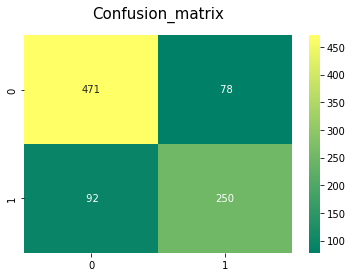

In [ ]:
from sklearn.linear_model import LogisticRegression           

model = LogisticRegression()
model.fit(X_train, y_train)
prediction_lr = model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the Logistic Regression is', round(accuracy_score(prediction_lr, y_test)*100, 2))
result_lr = cross_val_score(model, all_features, target, cv=10, scoring='accuracy')

print('The cross validated score for Logistic Regression is', round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model, all_features, target, cv=10)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### Decision Trees

-------------------The Accuracy of the model-------------------
The accuracy of the DecisionTree Classifier is 78.36
The cross validated score for Decision Tree classifier is 81.71


Text(0.5, 1.05, 'Confusion_matrix')

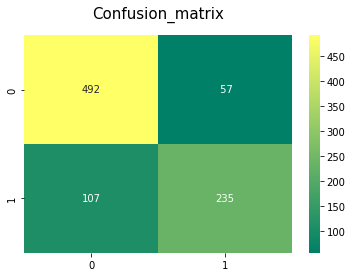

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini', 
    min_samples_leaf=5,
    max_features='auto',
    min_samples_split=10, 
)
model.fit(X_train, y_train)
prediction_tree=model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the DecisionTree Classifier is', round(accuracy_score(prediction_tree, y_test)*100,2))
result_tree = cross_val_score(model, all_features, target, cv=kfold, scoring='accuracy')

print('The cross validated score for Decision Tree classifier is', round(result_tree.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, target, cv=10)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### Random Forest

-------------------The Accuracy of the model-------------------
The accuracy of the Random Forest Classifier is 81.34
The cross validated score for Random Forest Classifier is 82.82


Text(0.5, 1.05, 'Confusion_matrix')

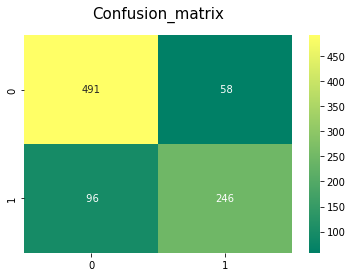

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_jobs=-1,
    oob_score=True,
    random_state=1, 
    criterion='gini', 
    n_estimators=700, 
    min_samples_leaf=1, 
    max_features='auto', 
    min_samples_split=10, 
)
model.fit(X_train.values, y_train)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(model.predict(X_test.values), y_test)*100, 2))
result_rm = cross_val_score(model, all_features.values, target, cv=kfold, scoring='accuracy')

print('The cross validated score for Random Forest Classifier is', round(result_rm.mean()*100, 2))
y_pred = cross_val_predict(model, all_features.values, target, cv=kfold)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### Support Vector Machines (Plot scatter/diagram, Linear SVC)

-------------------The Accuracy of the model-------------------
The accuracy of the Support Vector Machine Classifier is 83.21
The cross validated score for Support Vector Machine Classifier is 82.83


Text(0.5, 1.05, 'Confusion_matrix')

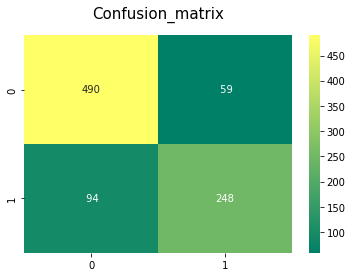

In [ ]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train, y_train)
prediction_svm = model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the Support Vector Machine Classifier is', round(accuracy_score(prediction_svm, y_test)*100, 2))
result_svm = cross_val_score(model, all_features, target, cv=10, scoring='accuracy')

print('The cross validated score for Support Vector Machine Classifier is', round(result_svm.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, target, cv=10)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### K-Nearest Neighbor (Plot scatter/diagram)

-------------------The Accuracy of the model-------------------
The accuracy of the K Nearst Neighbors Classifier is 82.46
The cross validated score for K Nearest Neighbors Classifier is 81.15


Text(0.5, 1.05, 'Confusion_matrix')

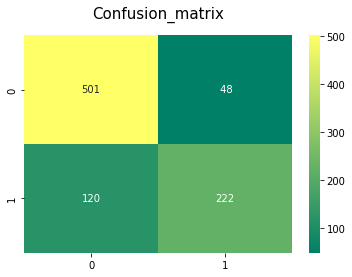

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train)
prediction_knn=model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the K Nearst Neighbors Classifier is', round(accuracy_score(prediction_knn, y_test)*100, 2))
result_knn = cross_val_score(model, all_features, target, cv=10, scoring='accuracy')

print('The cross validated score for K Nearest Neighbors Classifier is', round(result_knn.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, target, cv=10)

sns.heatmap(confusion_matrix(target,y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### Understand Gaussian NaiveBayes

-------------------The Accuracy of the model-------------------
The accuracy of the Gaussian Naive Bayes Classifier is 79.48
The cross validated score for Gaussian Naive Bayes classifier is 79.8


Text(0.5, 1.05, 'Confusion_matrix')

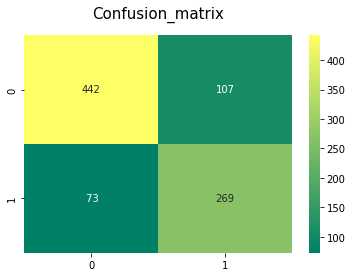

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
prediction_gnb = model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is', round(accuracy_score(prediction_gnb,y_test)*100, 2))
result_gnb = cross_val_score(model, all_features, target, cv=10, scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is', round(result_gnb.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, target, cv=10)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### AdaBoost

-------------------The Accuracy of the model-------------------
The accuracy of the AdaBoostClassifier is 81.72
The cross validated score for AdaBoostClassifier is 81.48


Text(0.5, 1.05, 'Confusion_matrix')

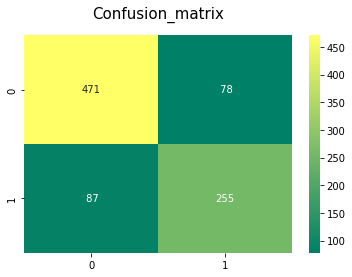

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb = model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the AdaBoostClassifier is', round(accuracy_score(prediction_adb,y_test)*100, 2))
result_adb = cross_val_score(model,all_features, target, cv=10, scoring='accuracy')

print('The cross validated score for AdaBoostClassifier is', round(result_adb.mean()*100, 2))
y_pred = cross_val_predict(model,all_features, target, cv=10)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### Gradient Boosting Classifier

-------------------The Accuracy of the model-------------------
The accuracy of the Gradient Boosting Classifier is 80.22
The cross validated score for Gradient Boosting Classifier is 82.49


Text(0.5, 1.05, 'Confusion_matrix')

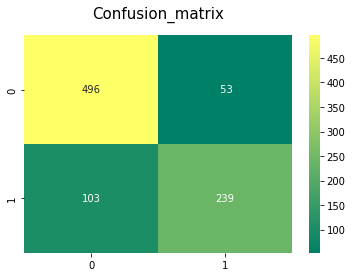

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
prediction_gbc = model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the Gradient Boosting Classifier is', round(accuracy_score(prediction_gbc, y_test)*100, 2))
result_gbc = cross_val_score(model, all_features, target, cv=10, scoring='accuracy')

print('The cross validated score for Gradient Boosting Classifier is', round(result_gbc.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, target, cv=10)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### Linear Discriminant Analysis

-------------------The Accuracy of the model-------------------
The accuracy of the LinearDiscriminantAnalysis is 80.97
The cross validated score for AdaBoostClassifier is 81.03


Text(0.5, 1.05, 'Confusion_matrix')

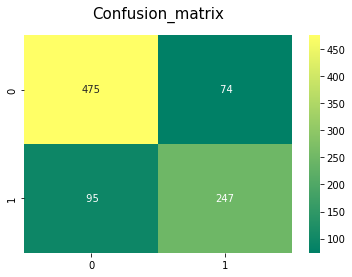

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
prediction_lda = model.predict(X_test)

print('-------------------The Accuracy of the model-------------------')
print('The accuracy of the LinearDiscriminantAnalysis is', round(accuracy_score(prediction_lda, y_test)*100, 2))
result_lda = cross_val_score(model, all_features, target, cv=10, scoring='accuracy')

print('The cross validated score for AdaBoostClassifier is', round(result_lda.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, target, cv=10)

sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

#### Model evaluation
##### Now rank our evaluation of all the models to choose the best one for our problem.

In [ ]:
models = pd.DataFrame({
  'Model': [
            'Logistic Regression', 
            'Decision Tree',
            'Random Forest',
            'Support Vector Machines',
            'KNN',
            'Gaussian Naive Bayes',
            'AdaBoost Classifier', 
            'Gradient Boosting',
            'Linear Discriminant Analysis'
          ],
  'Score': [
            result_lr.mean(), 
            result_tree.mean(),
            result_rm.mean(),
            result_svm.mean(),
            result_knn.mean(),
            result_gnb.mean(),
            result_adb.mean(), 
            result_gbc.mean(),
            result_lda.mean()
          ]
})

models.sort_values(by='Score', ascending=False)

Model     Score
3       Support Vector Machines  0.828277
2                 Random Forest  0.828227
7             Gradient Boosting  0.824931
1                 Decision Tree  0.817104
6           AdaBoost Classifier  0.814819
4                           KNN  0.811511
8  Linear Discriminant Analysis  0.810350
0           Logistic Regression  0.809226
5          Gaussian Naive Bayes  0.798027

#### Hyperparameter Tuninig 


Performing Grid search and Random search for:
1) SVM
2) LDA
3) Logistic Regression
4) Random Forest Classifier
5) Gradient Boosting Classifier
6) XGBoost 

Just a quick summary of the parameters that we will be using.

n_jobs : Number of cores used for the training process. If set to -1, all cores are used.

n_estimators : Number of classification trees in your learning model (set to 10 as default).

max_depth : Maximum depth of tree, or how much a node should be expanded. Beware if set to too high a number would run the risk of overfitting as one would be growing the tree too deep.

verbose : Controls whether you want to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.

In [ ]:
gender_submission.shape

(418, 2)

In [ ]:
# New Train and Test data
train_X = train.drop('Survived', axis=1)
train_Y = train['Survived']

test_X = test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1).copy()
test_X['Age'] = test_X['Age'].astype(int)

gender_submission.drop('PassengerId', axis=1)
test_Y = gender_submission['Survived']

train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((891, 8), (891,), (418, 8), (418,))

In [ ]:
train_X.head(2)

Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone
0       3    0    1     0         0      1           2        0
1       1    1    2     3         1      3           2        0

In [ ]:
test_X.head(2)

Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone
0       3    0    2     0         2      1           1        1
1       3    1    2     0         0      3           2        0

In [ ]:
# Importing roc_auc_score and GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#### SVM with Parameter Tuning

In [ ]:
# Creating Base Model
model = SVC(probability=True)

# Search grid for optimal parameters
param_grid = {
    'kernel': ['rbf'], 
    'C': [1, 10, 50, 100, 200, 300],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
}

model_svc_gsv = GridSearchCV(
    model, 
    cv = kfold,
    n_jobs= -1, 
    verbose = 1,
    scoring = 'accuracy', 
    param_grid = param_grid 
)

model_svc_gsv.fit(train_X, train_Y)

print(model_svc_gsv.best_score_)                      
print(model_svc_gsv.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
0.8305118601747814
SVC(C=50, gamma=0.01, probability=True)


In [ ]:
print('The accuracy of SVM Classifier is', round(accuracy_score(model_svc_gsv.predict(test_X), test_Y)*100, 2))
print("AUC - ROC :", round(roc_auc_score(test_Y, model_svc_gsv.predict(test_X))*100, 2))

The accuracy of SVM Classifier is 95.22
AUC - ROC : 95.54


#### Logistic Regression with Parameter Tuning

In [ ]:
# Creating Base Model
model = LogisticRegression()

# Search grid for optimal parameters
param_grid = {
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300],
    'C': [0.01, 0.1, 1, 10, 100],
    'tol': [0.0001, 0.0002, 0.0003],
    'intercept_scaling': [1, 2, 3, 4]
}

model_lr_gsv = GridSearchCV(
    model, 
    cv = kfold,
    n_jobs = -1, 
    verbose = 1,
    scoring = 'accuracy', 
    param_grid = param_grid
)

model_lr_gsv.fit(train_X, train_Y)

print(model_lr_gsv.best_score_)                      
print(model_lr_gsv.best_estimator_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
0.8114606741573033
LogisticRegression(C=1, solver='liblinear')


In [ ]:
print('The accuracy of Logistic Regression Classifier is', round(accuracy_score(model_lr_gsv.predict(test_X), test_Y)*100, 2))
print("AUC - ROC :", round(roc_auc_score(test_Y, model_lr_gsv.predict(test_X))*100, 2))

The accuracy of Logistic Regression Classifier is 94.02
AUC - ROC : 94.17


#### LDA with Parameter Tuning

In [ ]:
# Creating Base Model
model = LinearDiscriminantAnalysis()

param_grid = {
    'tol': [0.001, 0.002, .003, .004],
    'solver': ['svd', 'lsqr', 'eigen']
}

# Search grid for optimal parameters
model_lda_gsv = GridSearchCV(
    model,
    cv = 5, 
    n_jobs = 4, 
    verbose = 1,
    scoring = 'accuracy', 
    param_grid = param_grid, 
)

model_lda_gsv.fit(train_X, train_Y)

print(model_lda_gsv.best_score_)                      
print(model_lda_gsv.best_estimator_)                  

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8069612704789405
LinearDiscriminantAnalysis(tol=0.001)


In [ ]:
print('The accuracy of LDA Classifier is', round(accuracy_score(model_lda_gsv.predict(test_X), test_Y)*100, 2))
print("AUC - ROC :", round(roc_auc_score(test_Y, model_lda_gsv.predict(test_X))*100, 2))

The accuracy of LDA Classifier is 96.65
AUC - ROC : 96.66


#### Random Forest Classifier with Parameter Tuning

In [ ]:
# Creating Base Model
model = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

# Search grid for optimal parameters
param_grid = {
    'n_estimators': [180, 200, 220, 250],
    'max_features': [0.35, 0.40, 0.45, 0.48],
    'min_samples_leaf': [10, 15, 20, 25, 30],
}  
        
model_rf_gsv = GridSearchCV(
    model,
    cv = kfold, 
    n_jobs = -1, 
    verbose = 1,
    scoring = 'accuracy', 
    param_grid = param_grid
)

# Fitting Model without headers to avoid 'valid feature names' warning of RandomForestClassifier 
model_rf_gsv.fit(train_X.values, train_Y)

print(model_rf_gsv.best_score_)                        
print(model_rf_gsv.best_estimator_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
0.8350187265917602
RandomForestClassifier(max_features=0.4, min_samples_leaf=10, n_estimators=250,
                       n_jobs=-1, oob_score=True, random_state=42)


In [ ]:
# 0.818214731585518
# RandomForestClassifier(max_features=0.45, min_samples_leaf=25, n_estimators=200, n_jobs=-1, oob_score=True, random_state=42)
# 0.8249063670411985
# RandomForestClassifier(max_features=0.4, min_samples_leaf=10, n_estimators=220, n_jobs=-1, oob_score=True, random_state=42)

print('The accuracy of the Random Forest Classifier is', round(accuracy_score(model_rf_gsv.predict(test_X.values), test_Y)*100, 2))
print("AUC - ROC :", round(roc_auc_score(test_Y, model_rf_gsv.predict(test_X.values))*100, 2))
print(classification_report(model_rf_gsv.predict(test_X.values), test_Y))

The accuracy of the Random Forest Classifier is 92.82
AUC - ROC : 92.11
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       268
           1       0.89      0.91      0.90       150

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



#### Gradient Boosting with Parameter Tuning

In [ ]:
# Creating Base Model
model = GradientBoostingClassifier()

# Search grid for optimal parameters
param_grid = {
    'loss': ['deviance'],
    'max_depth': [5, 6, 7],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.6, 0.7, 0.8],
    'max_features': [0.45, 0.48, 0.49, 0.5],
    'min_samples_leaf': [175, 178, 179, 180],
}

model_gbc_gcv = GridSearchCV(
    model,
    cv = kfold,
    n_jobs = -1,
    verbose = 1,
    scoring = 'accuracy',
    param_grid = param_grid,
)

# Fitting model
model_gbc_gcv.fit(train_X, train_Y)

print(model_gbc_gcv.best_score_)                                   
print(model_gbc_gcv.best_estimator_)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
0.8216354556803994
GradientBoostingClassifier(learning_rate=0.6, max_depth=5, max_features=0.5,
                           min_samples_leaf=175, n_estimators=150)


In [ ]:
# 0.8204619225967541
# GradientBoostingClassifier(learning_rate=0.6, max_depth=6, max_features=0.5, min_samples_leaf=178)

print('The accuracy of the Gradient Boosting Classifier is', round(accuracy_score(model_gbc_gcv.predict(test_X), test_Y)*100, 2))
print("AUC - ROC :", round(roc_auc_score(test_Y, model_gbc_gcv.predict(test_X))*100, 2))

print(classification_report(model_gbc_gcv.predict(test_X), test_Y))

The accuracy of the Gradient Boosting Classifier is 89.0
AUC - ROC : 86.56
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       288
           1       0.78      0.91      0.84       130

    accuracy                           0.89       418
   macro avg       0.87      0.89      0.88       418
weighted avg       0.90      0.89      0.89       418



In [ ]:
model_gbc_gcv.predict(test_X)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

#### XGBoost with DMatrix

In [ ]:
import xgboost as xgb

# Converting train and test data to DMatrix format for XGBoost
d_test = xgb.DMatrix(test_X, label=test_Y)
d_train = xgb.DMatrix(train_X, label=train_Y)

In [ ]:
# params = {
#     'booster': 'gbtree',
#     'max_depth': 5, 
#     'learning_rate': 0.1,
#     # 'sample_type': 'uniform',
#     # 'normalize_type': 'tree',
#     'objective': 'binary:logistic',
#     # 'objective': 'binary:hinge',
#     # 'rate_drop': 0.1,
#     # 'n_estimators': 500
# }

params = {
    'gamma': 0,
    'lambda': 0.05,
    'subsample': 1, 
    'max_depth': 2,
    'reg_alpha': 0, 
    'base_score': 0.5, 
    'random_state': 10,
    'max_delta_step': 0, 
    'predictor': 'auto', 
    'booster': 'gbtree', 
    'learning_rate': 0.1, 
    'colsample_bynode': 1, 
    'min_child_weight': 2, 
    'colsample_bylevel': 1,
    'num_parallel_tree': 1,
    'tree_method': 'exact', 
    'colsample_bytree': 0.5,
    'validate_parameters': 1,
    'scale_pos_weight': None,
    'reg_lambda': 0.0500000007, 
    'objective': 'binary:hinge', 

    # 'n_estimators': 150, 
    # 'use_label_encoder': False,
    # 'enable_categorical': False, 

}

xgb_dmat = xgb.train(params, d_train)

# Make prediction
predictions = xgb_dmat.predict(d_test)

# Print accuracy score
print(np.round(accuracy_score(test_Y, predictions)*100, 2), '%')

77.75 %


In [ ]:
# Using CV
params = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'colsample_bytree': 0.3,
    'objective': 'binary:hinge'
}

cross_val = xgb.cv(
    params = params,
    dtrain = d_train, 
    nfold = 3,
    num_boost_round = 50, 
    early_stopping_rounds = 10, 
    metrics = 'logloss', 
    as_pandas = True, 
    seed = 42
)

print(cross_val.head())

   train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0           22.700233           0.267967          22.700235          0.535936
1           22.700233           0.267967          22.700235          0.535936
2           22.700233           0.267967          22.700235          0.535936
3           22.700233           0.267967          22.700235          0.535936
4           22.700233           0.267967          22.700235          0.535936


<Figure size 1152x864 with 0 Axes>

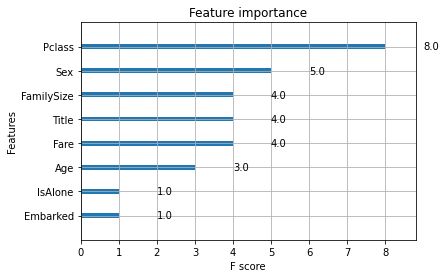

In [ ]:
# Visualizing feature importance
plt.figure(figsize=(16, 12))
xgb.plot_importance(xgb_dmat)
plt.show()

#### XGBoost with Parameter Tuning

In [ ]:
# Creating Base Model
model = xgb.XGBClassifier(use_label_encoder = False)

# Search grid for optimal parameters
param_grid = {
    'max_depth': [1, 2, 5],
    'lambda': [0, 0.05, 0.1], 
    'gamma': [0, 0.01, 0.03],
    'min_child_weight': [2, 3],
    'learning_rate': [0.05, 0.07, 0.1],
    'colsample_bytree': [0.50, 0.55, 0.60],

    # 'objective': ['binary: hinge']
    'objective': ['binary:logistic']
}

model_xgb_gcv = GridSearchCV(
    model,
    cv = kfold,
    n_jobs = -1,
    verbose = 1,
    scoring = 'accuracy',
    param_grid = param_grid,
)

model_xgb_gcv.fit(train_X, train_Y, eval_metric='logloss')

print(model_xgb_gcv.best_score_)                                   
print(model_xgb_gcv.best_estimator_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.8260435628648548
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', lambda=0,
              learning_rate=0.07, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [ ]:
print('The accuracy of the XGBoost Classifier is', round(accuracy_score(model_xgb_gcv.predict(test_X), test_Y)*100, 2))
print('AUC - ROC :', round(roc_auc_score(test_Y, model_xgb_gcv.predict(test_X))*100, 2))

print(classification_report(model_xgb_gcv.predict(test_X), test_Y))

The accuracy of the XGBoost Classifier is 94.98
AUC - ROC : 95.21
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       257
           1       0.96      0.91      0.93       161

    accuracy                           0.95       418
   macro avg       0.95      0.94      0.95       418
weighted avg       0.95      0.95      0.95       418



#### Bias Variance Tradeoff


    Learning curves are a good way to see the overfitting and underfitting effect on the training set and the effect of the training size on the accuracy. Learning curves plot the model's performance on the training set and the validation set as a function of training set size. To generate the plots, we simply train the model several times on different sized subsets of the training sets. In a nutshell, a learning curve shows how error changes as the training set size increases.
    If a models perform well on the training data but generalizes poorly according to the cross-validation metrics, the model is called overfitting. And again if it performs poorly on both, the model is called underfitting.


    Generate subplots of all the test and traning learning curve for all models.

    Parameters
    ----------
    
    axis: an axes.SubplotBase subclass of Axes (or a subclass of Axes)
        The axes of the subplot. The returned axes is then a subplot subclass of the base class.

    estimator: object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title: string
        Title for the chart.

    X: array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y: array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim: tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv: integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects.

    n_jobs: integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) 
        Produces 8 evenly spaced points in the range 0 to 10.

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
def learning_curve_subplot(
    axis, 
    title, 
    X, y,
    estimator,

    ylim=None, 
    cv=None, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if ylim is not None:
        axis.ylim(*ylim)

    axis.set_title(title)
    axis.set_ylabel('Score')
    axis.set_xlabel('Training examples')

    axis.grid()
    axis.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color='r')
    axis.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color='g')

    # understand this   
    axis.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    axis.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    axis.legend(loc='best')

In [ ]:
# Creating a series of all models 
model_info =	{
  'title': ['SVM', 'LDA', 'Logistic Regression', 'Random Forest', 'GBC', 'XGB'],
  'model': ['model_svc_gsv', 'model_lda_gsv', 'model_lr_gsv', 'model_rf_gsv', 'model_gbc_gcv', 'model_xgb_gcv']
}
model_info_sr = pd.Series(model_info)

In [ ]:
# Enumerating to pass first value as 1 for subplot axis instead of 0 
enumerate(model_info_sr)

In [ ]:
# Try getting no. of rows and cols as dynamic

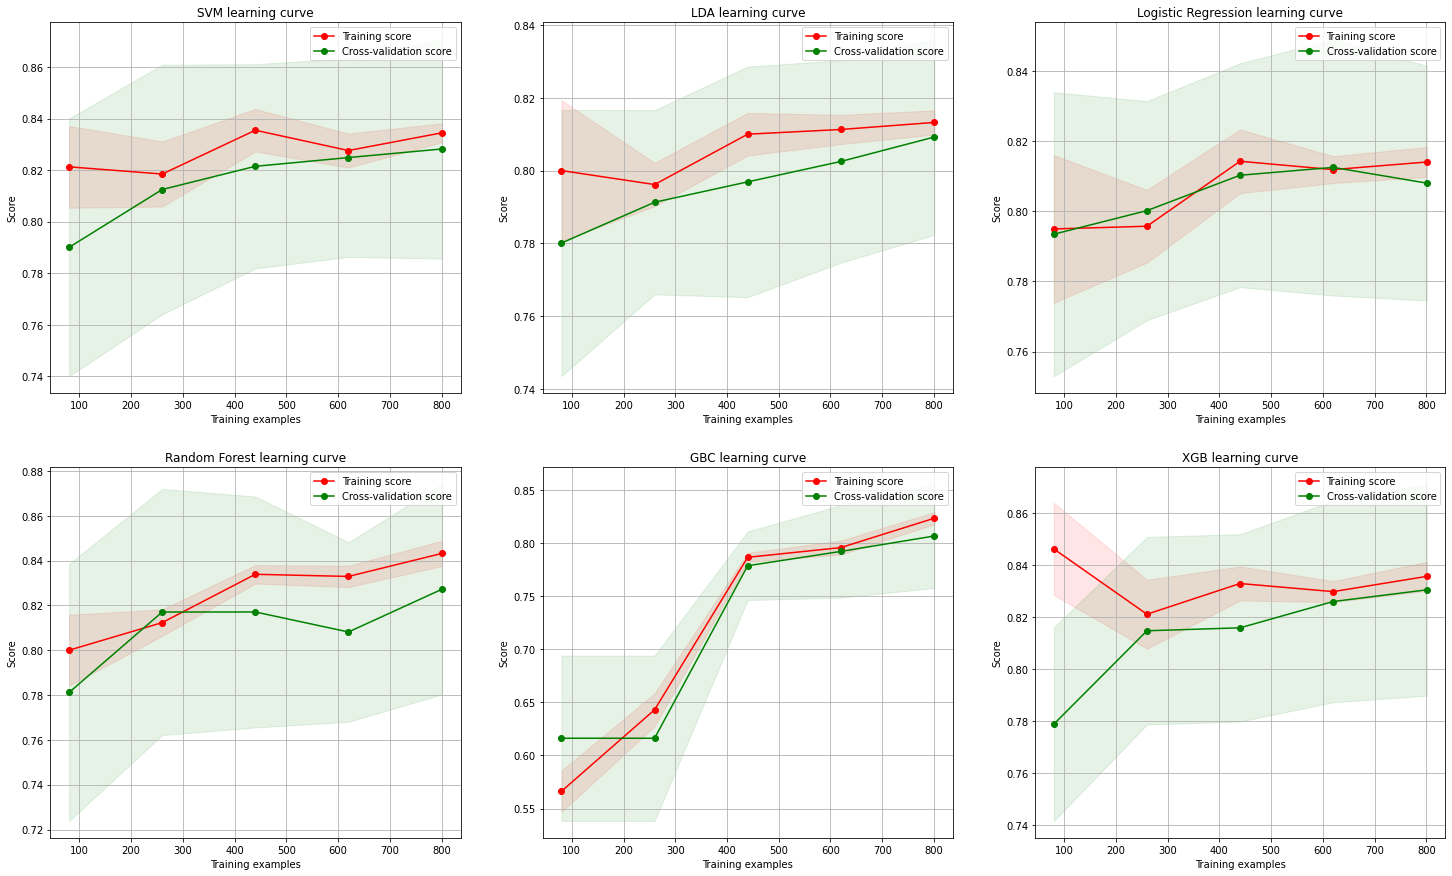

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))

itr = 0
for axis_mod in axes:
    for axis_mod_unpk in axis_mod:
        
        learning_curve_subplot(
            axis_mod_unpk, 
            title = model_info_sr['title'][itr] + ' learning curve',
            X = train_X, 
            y = train_Y, 
            estimator = eval(model_info_sr['model'][itr]).best_estimator_,
            cv = kfold
        )    
        itr += 1

plt.show()        

### Ensemble Modeling

    The another way to fine-tune our system is to try to combine the models that perform best. The goup will often perform better than the best individual model, especially if the individual models make very different types of errors.

    Building a model on top of many other models are called Ensemble Learning. And it is often a great way to push ML algorithm even further.

    Voting classifier is used to combine the predictions coming from the 3 classifiers. It is preferred to pass the argument soft to the voting parameter to take into account the probability of each vote.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# SVM LDA GBC and XGB

In [ ]:
VotingPredictor = VotingClassifier(estimators =
                           [('Linear Regression', model_lr_gsv.best_estimator_), 
                            ('Random Forest', model_rf_gsv.best_estimator_),
                            ('Gradient Boost', model_gbc_gcv.best_estimator_)],
                           voting='soft', n_jobs = 4)


VotingPredictor = VotingPredictor.fit(train_X, train_Y)

scores = cross_val_score(VotingPredictor, train_X, train_Y, cv = kfold, n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

[0.83333333 0.79775281 0.7752809  0.86516854 0.82022472 0.83146067
 0.88764045 0.7752809  0.7752809  0.83146067]
81.93
